# Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [ ]:
df = pd.read_csv("penguins_size.csv")

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Univariate Analysis

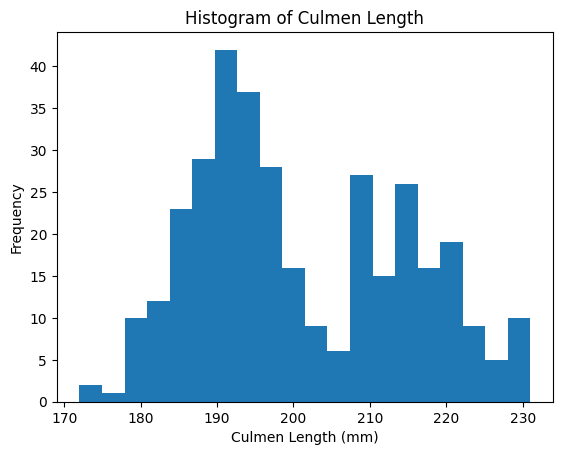

In [ ]:
plt.hist(df['flipper_length_mm'], bins=20)
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Flipper Length')
plt.show()

<ipython-input-25-8c4f14dc682e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.body_mass_g)


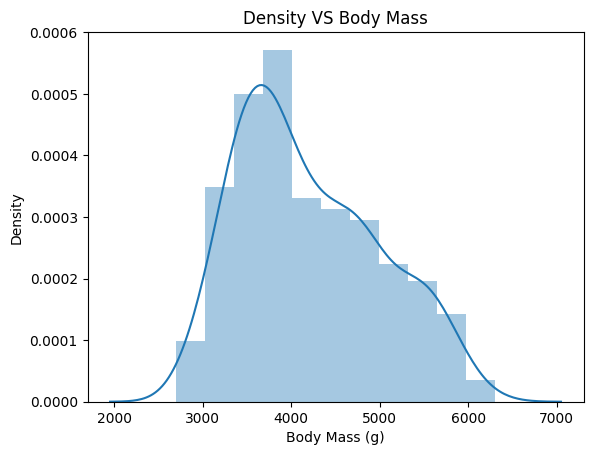

In [ ]:
sns.distplot(df.body_mass_g)
plt.title("Density VS Body Mass")
plt.ylabel("Density")
plt.xlabel("Body Mass (g)")
plt.show()

# Bi-Variate Analysis

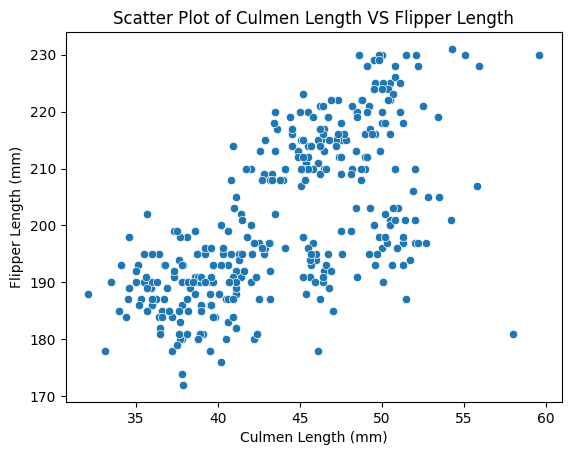

In [ ]:
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm', data=df)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatter Plot of Culmen Length VS Flipper Length')
plt.show()

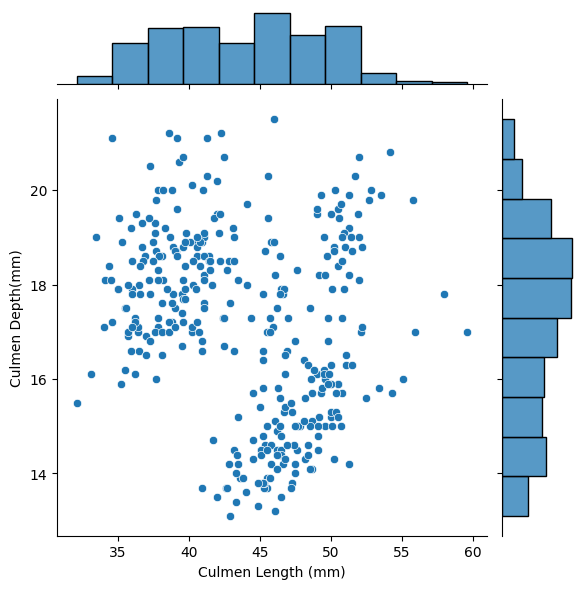

In [ ]:
sns.jointplot(x='culmen_length_mm',y='culmen_depth_mm',data=df)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth(mm)')
plt.show()

# Multi-variate Analysis

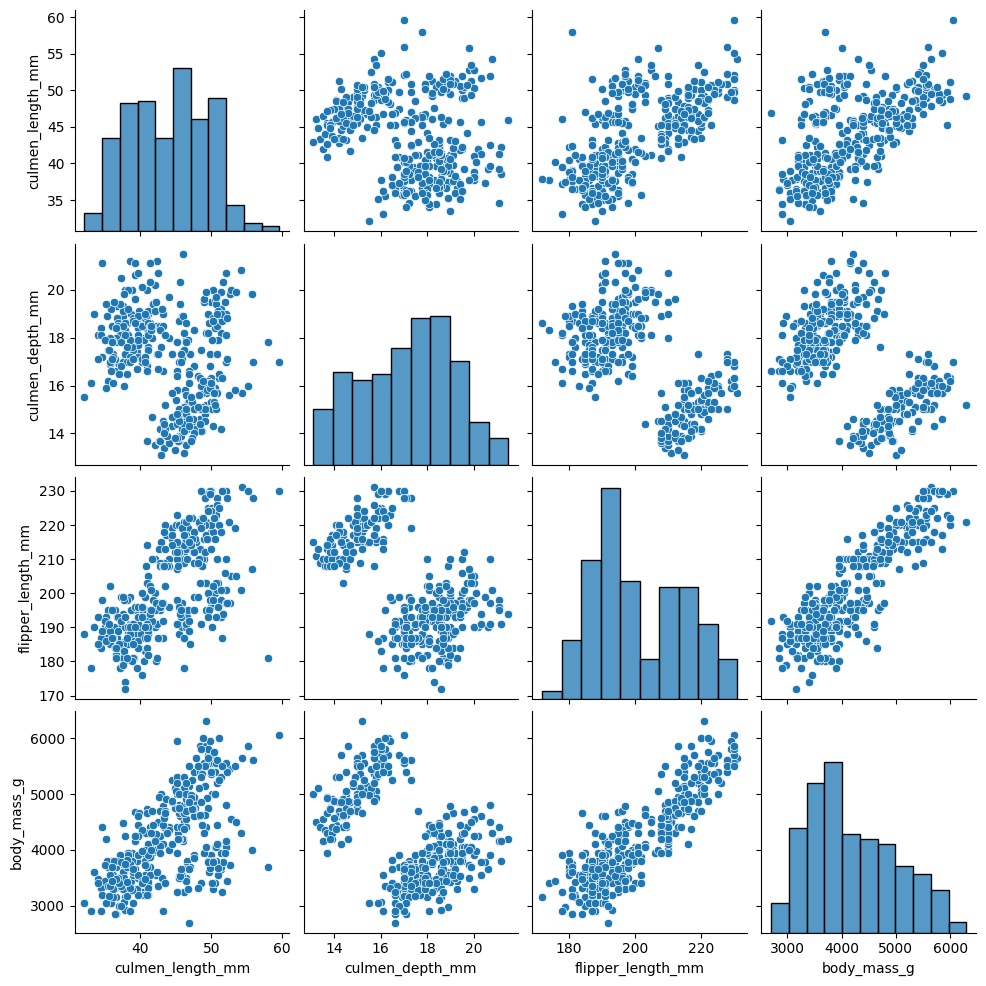

In [ ]:
sns.pairplot(df)

<ipython-input-28-0f52dd28a8b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


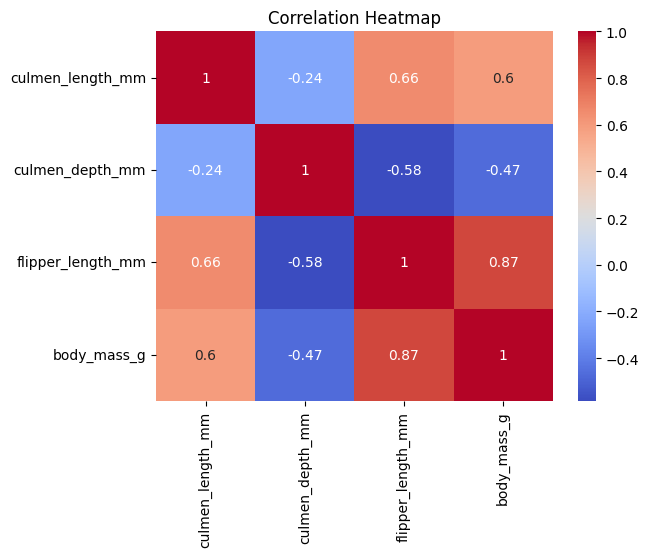

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Descriptive statistics on the dataset

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Checking for Missing values and dealing with them

In [ ]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)

# Using MODE to replace null values in categorical column
df['sex'].fillna(df['sex'].mode().iloc[0],inplace=True)

df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

# Checking the outliers and replacing them outliers

<Axes: >

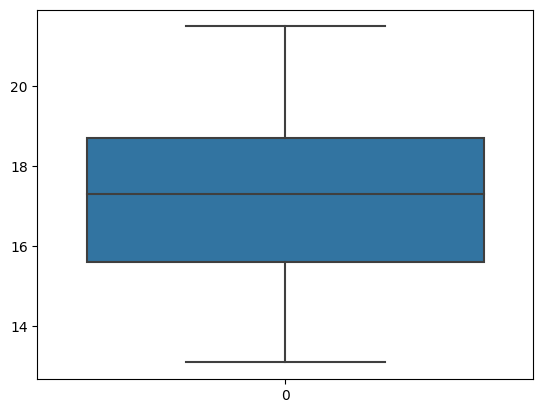

In [ ]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

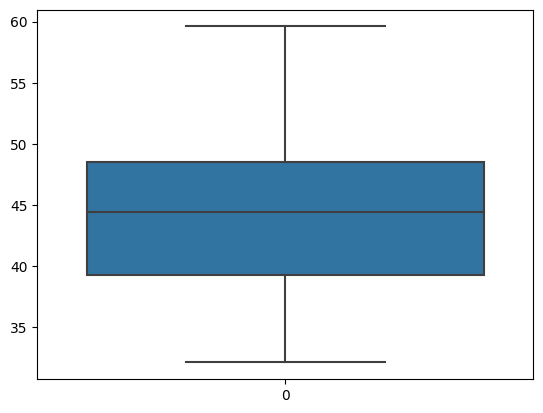

In [ ]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

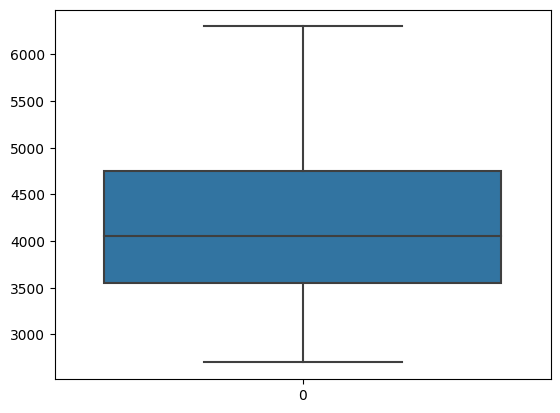

In [ ]:
sns.boxplot(df.body_mass_g)

<Axes: >

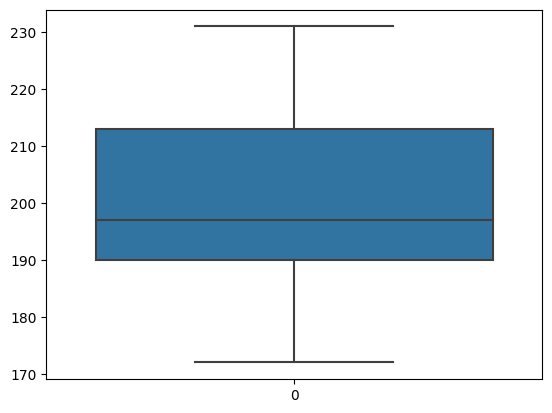

In [ ]:
sns.boxplot(df.flipper_length_mm)

Since there are no outliners in the given dataset so no need to replace them.

# Checking for Categorical columns and performing encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,NaN,NaN,NaN,NaN,3
4,0,2,36.7,19.3,193.0,3450.0,1


# Checking the correlation of independent variables with the target

In [62]:
df.corr().species.sort_values()

culmen_depth_mm     -0.744076
island              -0.635659
sex                 -0.010379
culmen_length_mm     0.731369
body_mass_g          0.750491
flipper_length_mm    0.854307
species              1.000000
Name: species, dtype: float64

# Spliting the data into dependent and independent variables

In [63]:
X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
3,2,NaN,NaN,NaN,NaN,3
4,2,36.7,19.3,193.0,3450.0,1


In [64]:
Y=df['species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

# Scaling the data

In [65]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scle = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scle.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,0.666667
1,1.0,0.269091,0.511905,0.237288,0.305556,0.333333
2,1.0,0.298182,0.583333,0.389831,0.152778,0.333333
3,1.0,NaN,NaN,NaN,NaN,1.000000
4,1.0,0.167273,0.738095,0.355932,0.208333,0.333333


# Spliting the data into training and testing

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scle,Y,test_size=0.2,random_state=0)

# Checking the training and testing data shape.

In [68]:
X_train.shape

(275, 6)

In [69]:
X_test.shape

(69, 6)

In [70]:
Y_train.shape

(275,)

In [71]:
Y_test.shape

(69,)